# Computer Assignment #0 Report
## Artificial Intelligence Course - Spring 1400 - University of Tehran
## Daneshvar Amrollahi (Student ID: 810197685)

### This is a warmup computer assignment for becoming familiar with some machine learning libraries in Python such as Pandas, Numpy, Matplotlib, and etc and doing a simple data analysis on the cars and finally predicting the prices of the cars with a NaN price using Linear Regression.

In [1]:
import pandas as pd

df = pd.read_csv("car_price_dataset.csv")

Data is loaded using this dataset. Both analysis and completion will be done in the computer assignment.

In [2]:
df.describe()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


Some basic statistical details are shown above:

**count**: Number of available datas each column

**maen**: Average of numerical datas in each column

**std**: Standard deviation of numerical datas in each column

**min**: Minimum value in a numerical column
 
**max** Maximum value in a numerical column

In [3]:
df.head(10)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.000
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.000
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.000
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.000
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN
5,6,audi fox,gas,177.3,66.3,53.1,2507,five,136.0,110.0,19,25,15250.000
6,7,audi 100ls,gas,192.7,71.4,55.7,2844,five,136.0,110.0,19,25,17710.000
7,8,audi 5000,gas,192.7,71.4,55.7,2954,five,136.0,110.0,19,25,18920.000
8,9,audi 4000,gas,192.7,71.4,55.9,3086,five,131.0,140.0,17,20,23875.000
9,10,audi 5000s (diesel),gas,178.2,67.9,52.0,3053,five,131.0,NaN,16,22,17859.167


First 10 lines of the dataset are shown above

In [4]:
df.tail(10)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
195,196,volvo 144ea,gas,188.8,67.2,57.5,3034,four,141.0,114.0,23,28,13415.0
196,197,volvo 244dl,gas,188.8,67.2,56.2,2935,four,141.0,114.0,24,28,15985.0
197,198,volvo 245,gas,188.8,67.2,57.5,3042,four,141.0,114.0,24,28,16515.0
198,199,volvo 264gl,gas,188.8,67.2,56.2,3045,four,130.0,162.0,17,22,18420.0
199,200,volvo diesel,gas,188.8,67.2,57.5,3157,four,130.0,162.0,17,22,18950.0
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


Last 10 lines of the dataset are shown abvoe

Now we replace **gas** by **0** and **diesel** by **1** which are numerical values and prefered.

In [5]:
df.loc[df['fueltype'] == "gas", 'fueltype'] = 0
df.loc[df['fueltype'] == "diesel", 'fueltype'] = 1
df.tail(10)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
195,196,volvo 144ea,0,188.8,67.2,57.5,3034,four,141.0,114.0,23,28,13415.0
196,197,volvo 244dl,0,188.8,67.2,56.2,2935,four,141.0,114.0,24,28,15985.0
197,198,volvo 245,0,188.8,67.2,57.5,3042,four,141.0,114.0,24,28,16515.0
198,199,volvo 264gl,0,188.8,67.2,56.2,3045,four,130.0,162.0,17,22,18420.0
199,200,volvo diesel,0,188.8,67.2,57.5,3157,four,130.0,162.0,17,22,18950.0
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,1,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,0,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


As you can see, row 203 which has **diesel** fueltype, is now replaced with **1** and the rows with **gas** fueltype are replaced with **0** as asked in the computer assignment description.

In [6]:
df['car_ID'].isna().sum()

0

In [7]:
df['fueltype'].isna().sum()

0

In [8]:
df['carlength'].isna().sum()

0

In [9]:
df['curbweight'].isna().sum()

0

In [10]:
df['cylindernumber'].isna().sum()

0

In [11]:
df['enginesize'].isna().sum()

14

14 cars have a NaN value for enginesize.

In [12]:
df['horsepower'].isna().sum()

23

23 cars have a NaN value for horsepower.

In [13]:
df['citympg'].isna().sum()

0

In [14]:
df['highwaympg'].isna().sum()

0

In [15]:
print(df['enginesize'].isna().sum())
df['enginesize'] = df['enginesize'].fillna((df['enginesize'].mean()))
print(df['enginesize'].isna().sum())

14
0


In [16]:
print(df['horsepower'].isna().sum())
df['horsepower'] = df['horsepower'].fillna((df['horsepower'].mean()))
print(df['horsepower'].isna().sum())

23
0


**NaN** cells in the columns **enginesize** and **horsepower** are filled with the average value in that column.

This method has both positive/negative points.

**Positive Points**
- Mean of a column can be good representitive of the whole data in that column. For example if it is showing the amount of salary of a group of people.

**Negative Points**
- The mean of a column might not be something meaningful. For example if we have binary values, their mean would be a number between 0 and 1 which doesn't specify anything.

- In some cases mean of a list of numbers is not a good representive and we can use median instead.

In [17]:
ndf = df.dropna(subset = ['price'])
ndf.head(10)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,13495.000
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,16500.000
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,six,152.0,154.000000,19,26,16500.000
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,four,109.0,105.747253,24,30,13950.000
5,6,audi fox,0,177.3,66.3,53.1,2507,five,136.0,110.000000,19,25,15250.000
6,7,audi 100ls,0,192.7,71.4,55.7,2844,five,136.0,110.000000,19,25,17710.000
7,8,audi 5000,0,192.7,71.4,55.7,2954,five,136.0,110.000000,19,25,18920.000
8,9,audi 4000,0,192.7,71.4,55.9,3086,five,131.0,140.000000,17,20,23875.000
9,10,audi 5000s (diesel),0,178.2,67.9,52.0,3053,five,131.0,105.747253,16,22,17859.167
10,11,bmw 320i,0,176.8,64.8,54.3,2395,four,108.0,101.000000,23,29,16430.000


As you can compare with the second cell in the notebook, row index 4 which has a NaN value in the price column, is eliminated. 

In [18]:
ndf['cylindernumber'].value_counts()

four      143
six        22
five        9
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [19]:
ndf[(ndf['fueltype'] == 0) & (ndf['horsepower'] > 100) & (ndf['citympg'] < 15)]

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
49,50,jaguar xk,0,191.7,70.6,47.8,3950,twelve,326.000000,262.000000,13,17,36000.0
73,74,buick century special,0,208.1,71.7,56.7,3900,eight,125.418848,105.747253,14,16,40960.0
74,75,buick regal sport coupe (turbo),0,199.2,72.0,55.4,3715,eight,304.000000,184.000000,14,16,45400.0


There are 3 rows with **fueltype = gas** and **horsepower > 100** and **citympg < 15**. If we only wanted the number of such items, we should have added **.sum()** to the command above

In [20]:
import time
st = time.time()
print("Average price of cars with gas fueltype is", ndf[(ndf['fueltype'] == 0)]['price'].mean())
fn = time.time()

print("%s seconds" %(fn - st))

Average price of cars with gas fueltype is 13170.738957831325
0.001116037368774414 seconds


In [21]:
import time

st = time.time()
s = 0
cnt = 0
for index, row in ndf.iterrows():
    if (row['fueltype'] == 0):
        s += row['price']
        cnt += 1
    
print("Average price of cars with gas fueltype is", s / cnt)
fn = time.time()

print("%s seconds" %(fn - st))

Average price of cars with gas fueltype is 13170.738957831325
0.02560567855834961 seconds


The vectorized implementation is much much faster. 

$0.004s < 0.02s$

In [22]:
import time

st = time.time()
print("Average price of cars with diesel fueltype is", ndf[(ndf['fueltype'] == 1)]['price'].mean())
fn = time.time()

print("%s seconds" %(fn - st))

Average price of cars with diesel fueltype is 15326.894736842105
0.0018565654754638672 seconds


In [23]:
import time

st = time.time()
s = 0
cnt = 0
for index, row in ndf.iterrows():
    if (row['fueltype'] == 1):
        s += row['price']
        cnt += 1
    
print("Average price of cars with diesel fueltype is", s / cnt)
fn = time.time()

print("%s seconds" %(fn - st))

Average price of cars with diesel fueltype is 15326.894736842105
0.020534038543701172 seconds


The vectorized implementation is much much faster.

$0.002 < 0.03$

### Now we draw the histogram of each column of our dataset:

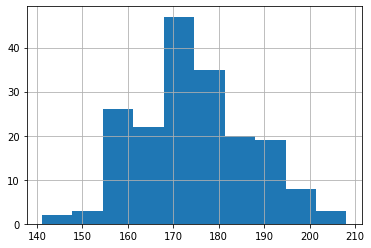

In [24]:
ndf['carlength'].hist()

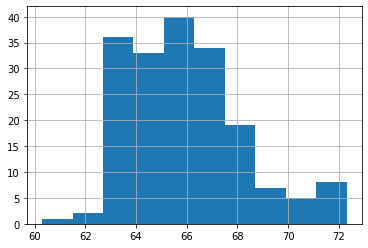

In [25]:
ndf['carwidth'].hist()

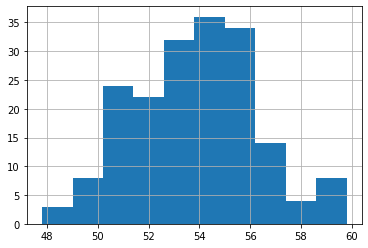

In [26]:
ndf['carheight'].hist()

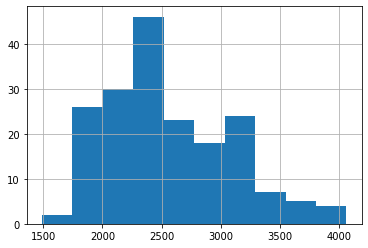

In [27]:
ndf['curbweight'].hist()

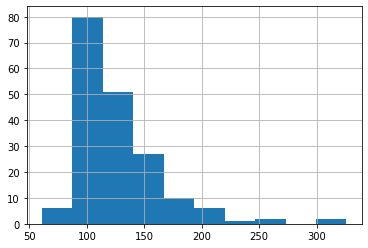

In [28]:
ndf['enginesize'].hist()

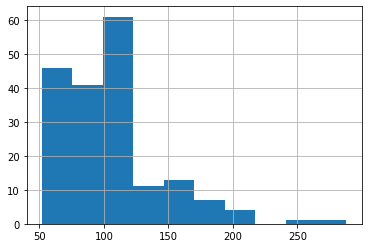

In [29]:
ndf['horsepower'].hist()

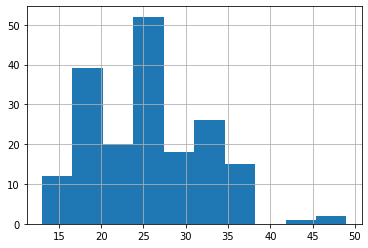

In [30]:
ndf['citympg'].hist()

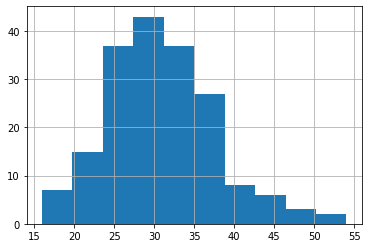

In [31]:
ndf['highwaympg'].hist()

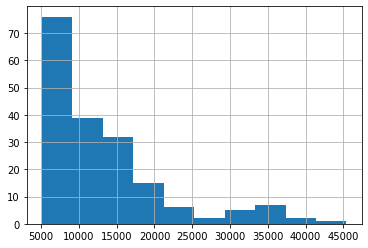

In [32]:
ndf['price'].hist()

In [33]:
price_mean = ndf['price'].mean()
price_std = ndf['price'].std()

ndf.loc[:, 'price'] = (ndf['price'] - ndf['price'].mean()) / (ndf['price'].std())

ndf.head(10)

/home/daneshvar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,0.012484
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,0.377353
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,six,152.0,154.000000,19,26,0.377353
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,four,109.0,105.747253,24,30,0.067731
5,6,audi fox,0,177.3,66.3,53.1,2507,five,136.0,110.000000,19,25,0.225577
6,7,audi 100ls,0,192.7,71.4,55.7,2844,five,136.0,110.000000,19,25,0.524272
7,8,audi 5000,0,192.7,71.4,55.7,2954,five,136.0,110.000000,19,25,0.671191
8,9,audi 4000,0,192.7,71.4,55.9,3086,five,131.0,140.000000,17,20,1.272830
9,10,audi 5000s (diesel),0,178.2,67.9,52.0,3053,five,131.0,105.747253,16,22,0.542384
10,11,bmw 320i,0,176.8,64.8,54.3,2395,four,108.0,101.000000,23,29,0.368854


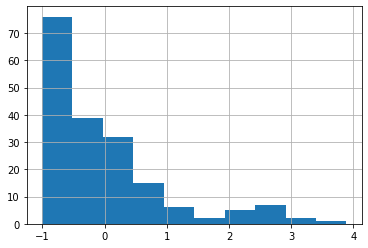

In [34]:
ndf['price'].hist()

As you can compare with the previous histogram of prices, the prices are normalized. 

Correlation:  0.6831044905212624


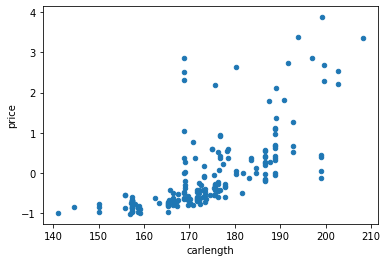

In [35]:
ndf.plot.scatter(x = "carlength", y = "price")
print("Correlation: ",ndf['carlength'].corr(ndf['price']))

Correlation:  0.7554898230376418


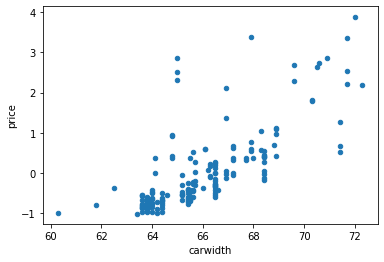

In [36]:
ndf.plot.scatter(x = "carwidth", y = "price")
print("Correlation: ", ndf['carwidth'].corr(ndf['price']))

Correlation:  0.11178300866357847


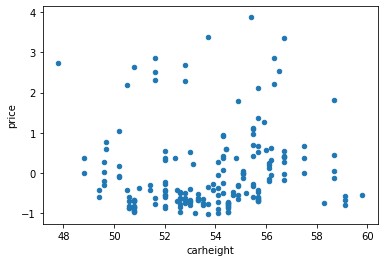

In [37]:
ndf.plot.scatter(x = "carheight", y = "price")
print("Correlation: ", ndf['carheight'].corr(ndf['price']))

Correlation:  0.8336024300713805


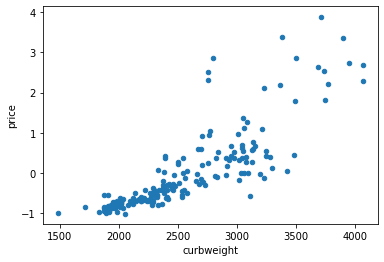

In [38]:
ndf.plot.scatter(x = "curbweight", y = "price")
print("Correlation: ", ndf['curbweight'].corr(ndf['price']))

Correlation:  0.7940255006472698


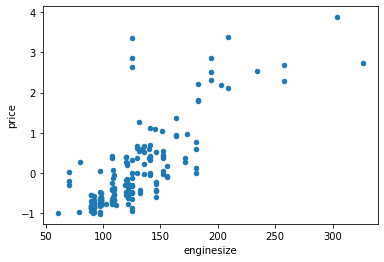

In [39]:
ndf.plot.scatter(x = "enginesize", y = "price")
print("Correlation: ", ndf['enginesize'].corr(ndf['price']))

Correlation:  0.7691815299720783


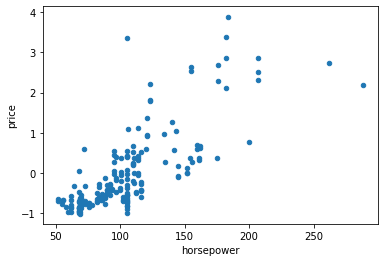

In [40]:
ndf.plot.scatter(x = "horsepower", y = "price")
print("Correlation: ", ndf['horsepower'].corr(ndf['price']))

Correlation:  -0.6871505026661747


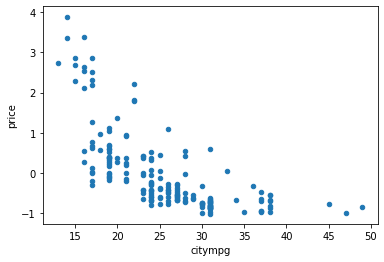

In [41]:
ndf.plot.scatter(x = "citympg", y = "price")
print("Correlation: ", ndf['citympg'].corr(ndf['price']))

Correlation:  -0.6988322792725984


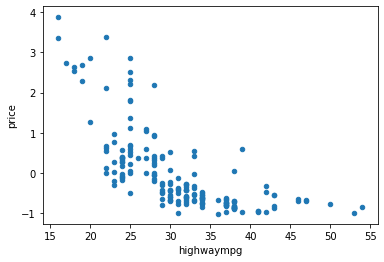

In [42]:
ndf.plot.scatter(x = "highwaympg", y = "price")
print("Correlation: ", ndf['highwaympg'].corr(ndf['price']))

Among all the columns, the **curbweight** column has the most correlation with **price**. Therefore, we choose this parameter.

Corr(curbweight, price) = 0.8336024300713805

In [43]:
nndf = ndf[['curbweight', 'price']]
nndf.head(10)

,curbweight,price
0,2548,0.012484
1,2548,0.377353
2,2823,0.377353
3,2337,0.067731
5,2507,0.225577
6,2844,0.524272
7,2954,0.671191
8,3086,1.272830
9,3053,0.542384
10,2395,0.368854


 ### Data for linear regression:

 ### $(X_1, Y_1), (X_2, Y_2), ... (X_n, Y_n)$

 ### $Y_i = $ price of car with curbweight $X_i$

 ### We add a column of $1$'s to form a $2 \times n$ matrix called $X$.

 ### $Y$ is a $n \times 1$ matrix.

 ### $h{_\theta}(x) = \hat{Y}(x) = \theta_{1}x + \theta_{0}$ = estimated value for price of car with curbweight $x$

 ### It can be proven that the $\theta$ minimizing the MSE is:

 ### $\theta = (X^{T}X)^{-1}X^{T}Y$

 ### $\theta$ is a $2 \times 1$ matrix here containing $\theta_{0}$ and $\theta_{1}$

In [44]:
import numpy as np

X = nndf['curbweight']
Y = nndf['price']

X_mat = np.vstack((np.ones(len(X)), X)).T
theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

yhat = X_mat.dot(theta) #predicted Y


In [45]:
theta

array([-4.03582012e+00,  1.57822508e-03])

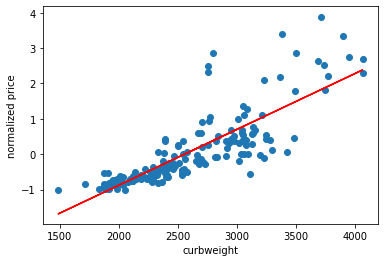

In [46]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel("curbweight")
plt.ylabel("normalized price")
plt.plot(X, yhat, color='red')

In [47]:
from sklearn.metrics import mean_squared_error 

print("Mean Squared Error calculated by sklearn is ", mean_squared_error(Y,yhat))

mse = ((Y - yhat)**2).mean()

print("Mean Squared Error calculated with vectorization is ", mse)

Mean Squared Error calculated by sklearn is  0.30345776161379695
Mean Squared Error calculated with vectorization is  0.30345776161379723


Mean Squared Error = MSE = $\frac{1}{N} \sum_{1}^{N}(y_i - h{_\theta}(x_i))^2$

In [48]:
X = df[df['price'].isnull()]
print("Cars with NaN prices:")
X

Cars with NaN prices:


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,five,136.000000,115.0,18,22,NaN
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,four,156.000000,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,four,92.000000,76.0,31,38,NaN
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,four,91.000000,68.0,31,38,NaN
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,four,91.000000,68.0,31,38,NaN
59,60,mazda 626,0,177.8,66.5,53.7,2385,four,122.000000,84.0,26,32,NaN
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,four,122.000000,84.0,26,32,NaN
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,five,183.000000,123.0,22,25,NaN
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,four,92.000000,68.0,31,38,NaN
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,four,156.000000,145.0,19,24,NaN


We create a matrix of curbweights with an extra column consisting of all 1's

In [49]:
Xmat = np.stack((np.ones(len(X['curbweight'])), X['curbweight'])).T

Xmat

array([[1.000e+00, 2.824e+03],
       [1.000e+00, 2.811e+03],
       [1.000e+00, 1.819e+03],
       [1.000e+00, 1.905e+03],
       [1.000e+00, 1.945e+03],
       [1.000e+00, 2.385e+03],
       [1.000e+00, 2.410e+03],
       [1.000e+00, 3.515e+03],
       [1.000e+00, 2.004e+03],
       [1.000e+00, 2.926e+03],
       [1.000e+00, 2.403e+03],
       [1.000e+00, 2.403e+03],
       [1.000e+00, 3.071e+03],
       [1.000e+00, 2.535e+03],
       [1.000e+00, 2.808e+03],
       [1.000e+00, 2.847e+03],
       [1.000e+00, 2.145e+03],
       [1.000e+00, 2.650e+03],
       [1.000e+00, 3.151e+03],
       [1.000e+00, 2.254e+03]])

In [50]:
Yhat = Xmat.dot(theta) #predicted Y for NaN cars (standard normal form)

Yhat 

array([ 0.42108751,  0.40057059, -1.16502869, -1.02930134, -0.96617233,
       -0.2717533 , -0.23229767,  1.51164105, -0.87305705,  0.58206647,
       -0.24334525, -0.24334525,  0.81090911, -0.03501953,  0.39583591,
        0.45738669, -0.65052732,  0.14647635,  0.93716712, -0.47850078])

By now we have the normalized predicted prices. Now we should revert them back to the original form.

In [51]:
X['price'] = Yhat * price_std + price_mean

X

/home/daneshvar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,five,136.000000,115.0,18,22,16860.190653
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,four,156.000000,145.0,19,24,16691.216568
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,four,92.000000,76.0,31,38,3797.194059
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,four,91.000000,68.0,31,38,4915.022623
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,four,91.000000,68.0,31,38,5434.942886
59,60,mazda 626,0,177.8,66.5,53.7,2385,four,122.000000,84.0,26,32,11154.065773
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,four,122.000000,84.0,26,32,11479.015937
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,five,183.000000,123.0,22,25,25841.813188
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,four,92.000000,68.0,31,38,6201.825273
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,four,156.000000,145.0,19,24,18185.987323


The values in the price column above, are the estimated prices for the cars.